# <span style="font-size: 30px; color: #000000; ; font-weight: bold;">Exploratory Data Analysis on Sales Data from an Electronics Retailer</span>

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Importing the necessary libraries
</p>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os
from itertools import combinations
from collections import Counter

In [2]:
ls

README.md           requirements.txt    sales_data/
eda.ipynb           sales_analysis_env/


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Creating a dataframe and merging the data from each month to it
</p>

In [3]:
df = pd.DataFrame()

In [4]:
files = os.listdir('./sales_data')

print(files)

['Sales_December_2019.csv', 'Sales_April_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv', 'Sales_August_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_January_2019.csv', 'Sales_September_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv']


In [5]:
for file in files:
    file_path = './sales_data/' + file
    temp = pd.read_csv(file_path)
    df = pd.concat([df, temp], ignore_index=True)

In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [7]:
df.shape

(186850, 6)

In [8]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Cleaning the data
</p>

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Renaming the columns
</p>

In [10]:
df.rename(columns={'Order ID': 'order_id', 'Product':'product', 'Quantity Ordered':'quantity', 'Price Each': 'item_price', 'Order Date':'date', 'Purchase Address':'address'}, inplace=True)

In [11]:
df.head()

,order_id,product,quantity,item_price,date,address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Dropping rows with NA values
</p>

In [12]:
df = df.dropna(axis='index', how='any', subset=['order_id'])

In [13]:
df.isna().sum()

order_id      0
product       0
quantity      0
item_price    0
date          0
address       0
dtype: int64

In [14]:
df.shape

(186305, 6)

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Dropping duplicate rows
</p>

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(185687, 6)

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Converting the columns to appropriate data types
</p>

In [17]:
df['order_id'].astype('int64')

ValueError: invalid literal for int() with base 10: 'Order ID'

In [18]:
filt = df['order_id'] == 'Order ID'
df.loc[filt, :]

,order_id,product,quantity,item_price,date,address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [19]:
df.drop(index=[254],inplace=True)

In [20]:
df['order_id'] = df['order_id'].astype('int64')

In [21]:
df['quantity'] = df['quantity'].astype('int64')

In [22]:
df['item_price'] = df['item_price'].astype('float64')

In [23]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y %H:%M')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   order_id    185686 non-null  int64         
 1   product     185686 non-null  object        
 2   quantity    185686 non-null  int64         
 3   item_price  185686 non-null  float64       
 4   date        185686 non-null  datetime64[ns]
 5   address     185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Making order_id the index of the dataframe
</p>

In [25]:
df.set_index('order_id', inplace=True)

In [26]:
df.head()

,product,quantity,item_price,date,address
order_id,,,,,
295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    1. Which month had the highest sales, and how much revenue was generated?
</p>

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Creating the sale_price column
</p>

In [27]:
df['sale_price'] = df['quantity'] * df['item_price']

In [28]:
df.head()

,product,quantity,item_price,date,address,sale_price
order_id,,,,,,
295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00
295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Creating the month column
</p>

In [29]:
def month_decider(date):
    return date.month

In [30]:
df['month'] = df['date'].apply(month_decider)

In [31]:
df.head()

,product,quantity,item_price,date,address,sale_price,month
order_id,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12
295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Grouping by month
</p>

In [32]:
month_grp = df.groupby('month')

In [33]:
temp = month_grp[['sale_price']].sum()
temp

,sale_price
month,
1,1821413.16
2,2200078.08
3,2804973.35
4,3389217.98
5,3150616.23
6,2576280.15
7,2646461.32
8,2241083.37
9,2094465.69


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Finding the month with the highest number of sales
</p>

In [34]:
temp.nlargest(1, columns=['sale_price'])

,sale_price
month,
12,4608295.7


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Plotting the variation of sales across the 12 months
</p>

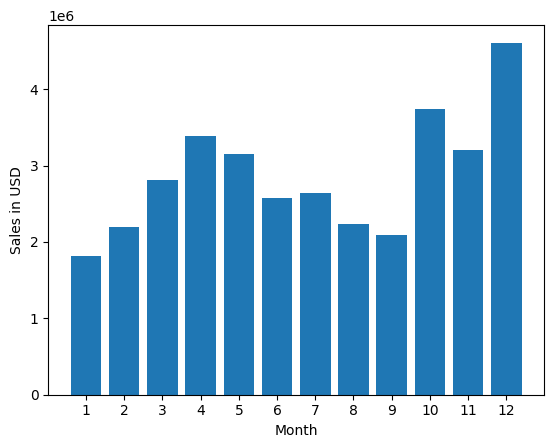

In [35]:
plt.bar(temp.index, temp['sale_price'])
plt.xticks(temp.index)
plt.xlabel('Month')
plt.ylabel('Sales in USD')

plt.show()

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    2. What city recorded the highest sales?
</p>

In [36]:
df.head()

,product,quantity,item_price,date,address,sale_price,month
order_id,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12
295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Creating the city column
</p>

In [37]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['city'] = df['address'].apply(lambda x: get_city(x) + ' ' + '(' + get_state(x)) + ')'

In [38]:
df.head()

,product,quantity,item_price,date,address,sale_price,month,city
order_id,,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,New York City (NY)
295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,New York City (NY)
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,New York City (NY)
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,San Francisco (CA)
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,Atlanta (GA)


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Grouping by city
</p>

In [39]:
city_grp = df.groupby('city')[['sale_price']]

In [40]:
temp = city_grp.sum()
temp

,sale_price
city,
Atlanta (GA),2794199.07
Austin (TX),1818044.33
Boston (MA),3658627.65
Dallas (TX),2765373.96
Los Angeles (CA),5448304.28
New York City (NY),4661867.14
Portland (ME),449321.38
Portland (OR),1870010.56
San Francisco (CA),8254743.55


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Finding the city with highest number of sales
</p>

In [41]:
temp.nlargest(1, columns='sale_price')

,sale_price
city,
San Francisco (CA),8254743.55


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Plotting the variation of sales across the various cities
</p>

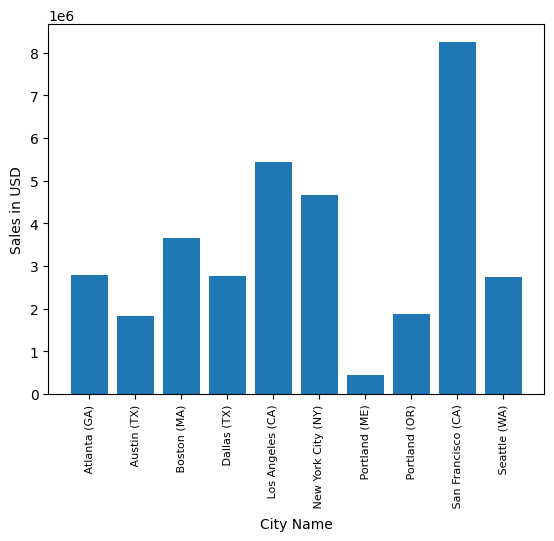

In [42]:
plt.bar(temp.index, temp['sale_price'])
plt.xticks(temp.index, rotation='vertical', size=8)
plt.xlabel('City Name')
plt.ylabel('Sales in USD')

plt.show()

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    3. When is the best time to display ads for maximum sales impact?
</p> 

In [43]:
df.head()

,product,quantity,item_price,date,address,sale_price,month,city
order_id,,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,New York City (NY)
295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,New York City (NY)
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,New York City (NY)
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,San Francisco (CA)
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,Atlanta (GA)


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Creating a Hour column
</p> 

In [44]:
df['Hour'] = df['date'].dt.hour

In [45]:
df.head()

,product,quantity,item_price,date,address,sale_price,month,city,Hour
order_id,,,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,New York City (NY),0
295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,New York City (NY),7
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,New York City (NY),18
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,San Francisco (CA),15
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,Atlanta (GA),12


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Grouping by Hour
</p> 

In [46]:
hour_grp = df.groupby('Hour')

In [47]:
temp = hour_grp.count()[['product']]
temp

,product
Hour,
0,3902
1,2347
2,1242
3,830
4,852
5,1320
6,2481
7,4002
8,6252


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Finding the hour where highest number of sales occured
</p>

In [48]:
temp.nlargest(1, columns='product')

,product
Hour,
19,12886


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Plotting the variation of sales across various hours
</p>

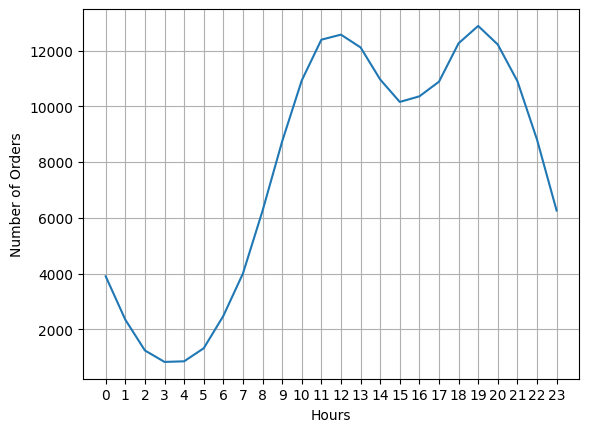

In [49]:
plt.plot(temp.index, temp['product'])

plt.xticks(temp.index)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()

plt.show()

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    4. What products are frequently purchased together?
</p> 

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Resetting the index 
</p> 

In [50]:
df.reset_index(inplace=True)

In [51]:
df.head()

,order_id,product,quantity,item_price,date,address,sale_price,month,city,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,New York City (NY),0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,New York City (NY),7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,New York City (NY),18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,San Francisco (CA),15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,Atlanta (GA),12


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    creating a new dataframe with just the duplicates
</p> 

In [52]:
filt = df['order_id'].duplicated(keep=False)
dup_df = df.loc[filt,['order_id', 'product']]
dup_df.head(10)

,order_id,product
16,295681,Google Phone
17,295681,USB-C Charging Cable
18,295681,Bose SoundSport Headphones
19,295681,Wired Headphones
36,295698,Vareebadd Phone
37,295698,USB-C Charging Cable
42,295703,AA Batteries (4-pack)
43,295703,Bose SoundSport Headphones
66,295726,iPhone
67,295726,Lightning Charging Cable


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    creating a grouped column
</p> 

In [53]:
dup_df['grouped'] = dup_df.groupby('order_id')['product'].transform(lambda x: ','.join(x))

In [54]:
dup_df.head(10)

,order_id,product,grouped
16,295681,Google Phone,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,"Vareebadd Phone,USB-C Charging Cable"
37,295698,USB-C Charging Cable,"Vareebadd Phone,USB-C Charging Cable"
42,295703,AA Batteries (4-pack),"AA Batteries (4-pack),Bose SoundSport Headphones"
43,295703,Bose SoundSport Headphones,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,iPhone,"iPhone,Lightning Charging Cable"
67,295726,Lightning Charging Cable,"iPhone,Lightning Charging Cable"


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Dropping duplicates 
</p> 

In [55]:
dup_df.drop_duplicates(subset='order_id', inplace=True)

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Dropping the product column 
</p> 

In [56]:
dup_df.drop(columns='product', inplace=True)

In [57]:
dup_df.head(10)

,order_id,grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
80,295737,"iPhone,Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor,Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones,Wired Headphones"
129,295783,"Vareebadd Phone,USB-C Charging Cable"
133,295786,"USB-C Charging Cable,Apple Airpods Headphones"


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Using counter and combinations to find the products which are most frequently purchased together
</p> 

In [58]:
count = Counter()

for row in dup_df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(5)

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    5. Which product had the highest sales, and what factors might explain its success?
</p> 

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Grouping by product
</p> 

In [59]:
prod_grp = df.groupby('product')[['quantity']]

In [60]:
temp = prod_grp.sum()
temp

,quantity
product,
20in Monitor,4126
27in 4K Gaming Monitor,6239
27in FHD Monitor,7541
34in Ultrawide Monitor,6192
AA Batteries (4-pack),27615
AAA Batteries (4-pack),30986
Apple Airpods Headphones,15637
Bose SoundSport Headphones,13430
Flatscreen TV,4813


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Finding the product that sold the most
</p> 

In [61]:
temp.nlargest(1, columns='quantity')

,quantity
product,
AAA Batteries (4-pack),30986


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Plotting the quantity sold for different products
</p> 

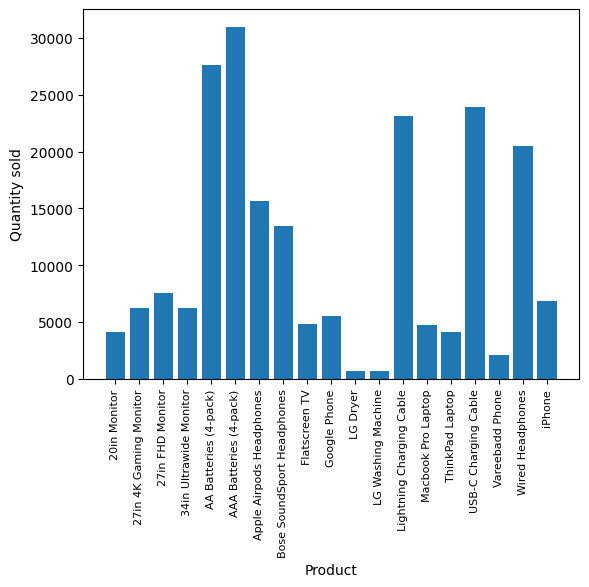

In [62]:
plt.bar(temp.index, temp['quantity'])
plt.xticks(prod_grp.sum().index, rotation='vertical', size=8)
plt.ylabel('Quantity sold')
plt.xlabel('Product')

plt.show()

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Finding the price for each product
</p> 

In [63]:
prices = df[['product', 'item_price']].drop_duplicates()
prices.set_index('product', inplace=True)
prices.sort_index(inplace=True)
prices


,item_price
product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


In [64]:
products = prices.index

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Getting the quantity sold for each product
</p> 

In [65]:
quantities = temp.sort_index()
quantities

,quantity
product,
20in Monitor,4126
27in 4K Gaming Monitor,6239
27in FHD Monitor,7541
34in Ultrawide Monitor,6192
AA Batteries (4-pack),27615
AAA Batteries (4-pack),30986
Apple Airpods Headphones,15637
Bose SoundSport Headphones,13430
Flatscreen TV,4813


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Plotting to prove the inverse correlation between quantity ordered and item price
</p> 

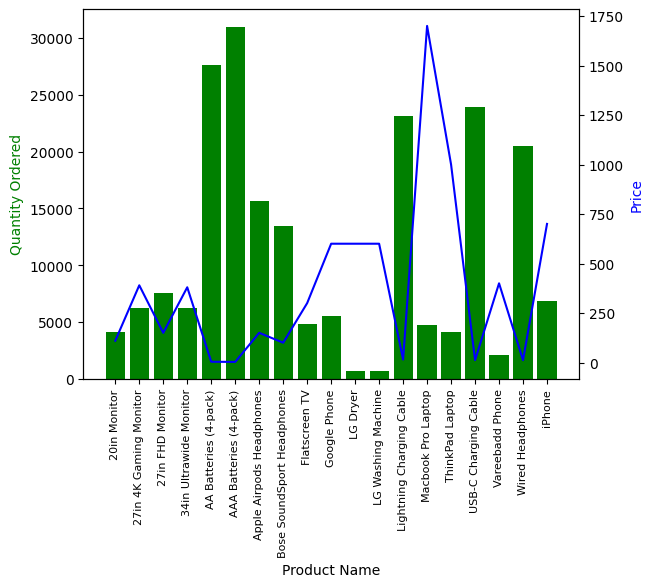

In [66]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantities['quantity'], color='g')
ax2.plot(products, prices['item_price'], 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticks(range(len(products)))  
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()